<a href="https://colab.research.google.com/github/ThanadolKl/FinalProject_ProbStat_Data_Analysis_of_the_growth_trends-of-GDP/blob/main/Final_of_Project_Probstat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This code for  Team Project 21022103, focusing on the analysis of the growth trends of GDP and other influential factors affecting the debt of Thai individuals. [Probability and Statistics for Electrical Engineering [2013/1]].
Members : Teetat Saelor  6532099121 [SEC 1] , Thanadol Klainin  6532083021 [SEC 2]


#Import Libraly

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


#Import Data

In [ ]:
"""
!wget -O Debt.csv "https://drive.google.com/file/d/1v12XsNurzLAp7I8CJUkWMjFhJsFXbJ_9/view?usp=drive_link"
!wget -O GDP.csv "https://drive.google.com/file/d/1yq2LM40njB1VPsKW6hV9JamM6a2VxJgp/view?usp=drive_link"
!wget -O GDP_Q.csv "https://drive.google.com/file/d/1Me_qOISXhDEJLdpCuwq2hztqHioPo5_z/view?usp=drive_link"
!wget -O GDP_filter.csv "https://drive.google.com/file/d/1BEps40UMCLfeozYvu16bDFO8aDh8QTSS/view?usp=drive_link"
!wget -O Interest_Q.csv "https://drive.google.com/file/d/1PxtMX0gEQ5D4uuK-3o9XG8LpiCMSpENR/view?usp=drive_link"
!wget -O Interest_filter.csv "https://drive.google.com/file/d/1hfhoF1nN7AUdtXLgAa0dfJR0ozrgz1xh/view?usp=drive_link"
!wget -O NPLs.csv "https://drive.google.com/file/d/1HskchIjnUxf_lvFLJysIERJMLUQ3pFIq/view?usp=drive_link"
!wget -O NPLs_filter.csv "https://drive.google.com/file/d/1_pqrQ1UZ0Qjkz9NiaRTtHch6VT2cKKey/view?usp=drive_link"
!wget -O Policy_Interest.csv "https://drive.google.com/file/d/1L0B-u5Cg53utMHMI6EMviUp_Ja-dN8A3/view?usp=drive_link"
"""

'\n!wget -O Debt.csv "https://drive.google.com/file/d/1v12XsNurzLAp7I8CJUkWMjFhJsFXbJ_9/view?usp=drive_link"\n!wget -O GDP.csv "https://drive.google.com/file/d/1yq2LM40njB1VPsKW6hV9JamM6a2VxJgp/view?usp=drive_link"\n!wget -O GDP_Q.csv "https://drive.google.com/file/d/1Me_qOISXhDEJLdpCuwq2hztqHioPo5_z/view?usp=drive_link"\n!wget -O GDP_filter.csv "https://drive.google.com/file/d/1BEps40UMCLfeozYvu16bDFO8aDh8QTSS/view?usp=drive_link"\n!wget -O Interest_Q.csv "https://drive.google.com/file/d/1PxtMX0gEQ5D4uuK-3o9XG8LpiCMSpENR/view?usp=drive_link"\n!wget -O Interest_filter.csv "https://drive.google.com/file/d/1hfhoF1nN7AUdtXLgAa0dfJR0ozrgz1xh/view?usp=drive_link"\n!wget -O NPLs.csv "https://drive.google.com/file/d/1HskchIjnUxf_lvFLJysIERJMLUQ3pFIq/view?usp=drive_link"\n!wget -O NPLs_filter.csv "https://drive.google.com/file/d/1_pqrQ1UZ0Qjkz9NiaRTtHch6VT2cKKey/view?usp=drive_link"\n!wget -O Policy_Interest.csv "https://drive.google.com/file/d/1L0B-u5Cg53utMHMI6EMviUp_Ja-dN8A3/view?usp=drive_

In [ ]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

#Data Exploring

In [ ]:
## GDP
df_GDP = pd.read_csv('/content/GDP.csv')
df_GDP = df_GDP.dropna(axis=0)
df_GDP = df_GDP.dropna(axis=1)
print(df_GDP)

## Debt
df_debt = pd.read_csv('/content/Debt.csv')
print(df_debt)

## NPLs
df_NPLs = pd.read_csv('/content/NPLs.csv')
print(df_NPLs)

## Policy Interest
df_interest = pd.read_csv('/content/Policy_Interest.csv')
print(df_interest)

       Year           GDP  %GDP rate (y-0-y) (CVM)
0      2011  8.301559e+06                      0.8
1   2011/Q1  2.209743e+06                      3.3
2   2011/Q2  2.037494e+06                      1.8
3   2011/Q3  2.029932e+06                      2.4
4   2011/Q4  2.024390e+06                     -4.0
5      2012  8.902824e+06                      7.2
6   2012/Q1  2.272805e+06                      2.9
7   2012/Q2  2.160308e+06                      6.0
8   2012/Q3  2.132192e+06                      5.0
9   2012/Q4  2.337519e+06                     15.5
10     2013  9.142087e+06                      2.7
11  2013/Q1  2.395328e+06                      5.4
12  2013/Q2  2.219187e+06                      2.7
13  2013/Q3  2.185277e+06                      2.5
14  2013/Q4  2.342295e+06                      0.2
15     2014  9.232088e+06                      1.0
16  2014/Q1  2.386444e+06                     -0.4
17  2014/Q2  2.237768e+06                      0.8
18  2014/Q3  2.208912e+06      

In [ ]:
df_GDP['Year']

0        2011
1     2011/Q1
2     2011/Q2
3     2011/Q3
4     2011/Q4
5        2012
6     2012/Q1
7     2012/Q2
8     2012/Q3
9     2012/Q4
10       2013
11    2013/Q1
12    2013/Q2
13    2013/Q3
14    2013/Q4
15       2014
16    2014/Q1
17    2014/Q2
18    2014/Q3
19    2014/Q4
20       2015
21    2015/Q1
22    2015/Q2
23    2015/Q3
24    2015/Q4
25       2016
26    2016/Q1
27    2016/Q2
28    2016/Q3
29    2016/Q4
30       2017
31    2017/Q1
32    2017/Q2
33    2017/Q3
34    2017/Q4
35       2018
36    2018/Q1
37    2018/Q2
38    2018/Q3
39    2018/Q4
40       2019
41    2019/Q1
42    2019/Q2
43    2019/Q3
44    2019/Q4
45       2020
46    2020/Q1
47    2020/Q2
48    2020/Q3
49    2020/Q4
50       2021
51    2021/Q1
52    2021/Q2
53    2021/Q3
54    2021/Q4
55       2022
56    2022/Q1
57    2022/Q2
58    2022/Q3
59    2022/Q4
Name: Year, dtype: object

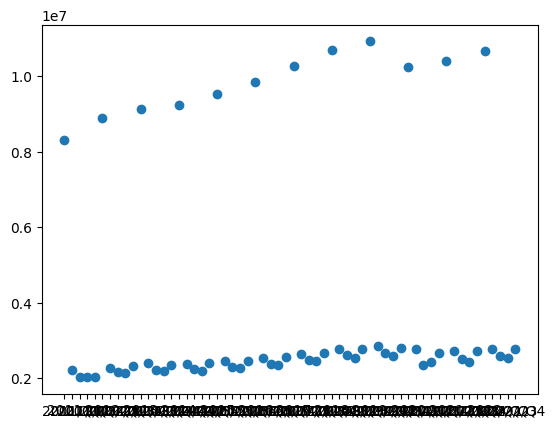

In [ ]:

plt.scatter(df_GDP['Year'], df_GDP['GDP'])


#Data Preparation

Use interpolate technique to add missing value of missing years (Debt df)

In [ ]:
import pandas as pd
import numpy as np

# Read data from CSV file
df = pd.read_csv('/content/Debt.csv')
df_use = df[(df['REGION'] == 'All Region') & (df['SOC_ECO_CLASS'] == 'Total') & (df['SOURCE_LOAN'] == 'Total') & (df['PURPOSE_BORROW'] == 'Total')]

# Set 'YEAR' column as index if it's not already
df_use.set_index('YEAR', inplace=True)

# Create a range of years from the minimum to maximum in the dataset
all_years = range(df_use.index.min(), df_use.index.max() + 1)

# Reindex the DataFrame to include missing years and fill with NaN values
df_reindexed = df_use.reindex(all_years, fill_value=np.nan)

# Interpolate the 'VALUE [Baht]' column in the reindexed DataFrame
df_reindexed['VALUE [Baht]'] = df_reindexed['VALUE [Baht]'].interpolate(method='linear')

# Reset index if needed
df_reindexed.reset_index(inplace=True)

# Print the DataFrame with interpolated 'VALUE [Baht]' column
print(df_reindexed)

    YEAR      REGION SOC_ECO_CLASS SOURCE_LOAN PURPOSE_BORROW  VALUE [Baht]
0   2011  All Region         Total       Total          Total     134900.00
1   2012         NaN           NaN         NaN            NaN     148993.50
2   2013  All Region         Total       Total          Total     163087.00
3   2014         NaN           NaN         NaN            NaN     167063.75
4   2015         NaN           NaN         NaN            NaN     171040.50
5   2016         NaN           NaN         NaN            NaN     175017.25
6   2017  All Region         Total       Total          Total     178994.00
7   2018         NaN           NaN         NaN            NaN     171524.50
8   2019  All Region         Total       Total          Total     164055.00
9   2020         NaN           NaN         NaN            NaN     184867.00
10  2021  All Region         Total       Total          Total     205679.00


In [ ]:
df_reindexed['YEAR'][2:]
df_debt_test = pd.concat([df_reindexed['YEAR'][2:], df_reindexed['VALUE [Baht]'][2:]], axis=1, ignore_index=True)
df_debt_test.columns = ['Year', 'Debt']
df_debt_test.reset_index(drop=True, inplace=True)

print(df_debt_test)

   Year       Debt
0  2013  163087.00
1  2014  167063.75
2  2015  171040.50
3  2016  175017.25
4  2017  178994.00
5  2018  171524.50
6  2019  164055.00
7  2020  184867.00
8  2021  205679.00


# Ceate Dataframe (Use for correlation)

In [ ]:
df_npl_filter = pd.read_csv('/content/NPLs_filter.csv')
print(df_npl_filter)
df_GDP_filter = pd.read_csv('/content/GDP_filter.csv')
print(df_GDP_filter)
df_inter_filter = pd.read_csv('/content/Interest_filter.csv')
print(df_inter_filter)

     Year  Total NPLs
0  2013.0   1051847.0
1  2014.0   1134767.0
2  2015.0   1307913.0
3  2016.0   1510397.0
4  2017.0   1677951.0
5  2018.0   1772241.0
6  2019.0   1838996.0
7  2020.0   2041951.0
8  2021.0   2159633.0
   Year         GDP  %GDP (YoY)(CVM)
0  2013   9142087.0              2.7
1  2014   9232088.0              1.0
2  2015   9521426.0              3.1
3  2016   9848502.0              3.4
4  2017  10259941.0              4.2
5  2018  10693205.0              4.2
6  2019  10919319.0              2.1
7  2020  10256852.0             -6.1
8  2021  10409894.0              1.5
   Year  avg interest
0  2013          2.54
1  2014          2.04
2  2015          1.60
3  2016          1.50
4  2017          1.50
5  2018          1.52
6  2019          1.60
7  2020          0.65
8  2021          0.50


#Heat Map

   Year       Debt         GDP  %GDP (YoY)(CVM)  avg interest  Total NPLs
0  2013  163087.00   9142087.0              2.7          2.54   1051847.0
1  2014  167063.75   9232088.0              1.0          2.04   1134767.0
2  2015  171040.50   9521426.0              3.1          1.60   1307913.0
3  2016  175017.25   9848502.0              3.4          1.50   1510397.0
4  2017  178994.00  10259941.0              4.2          1.50   1677951.0
5  2018  171524.50  10693205.0              4.2          1.52   1772241.0
6  2019  164055.00  10919319.0              2.1          1.60   1838996.0
7  2020  184867.00  10256852.0             -6.1          0.65   2041951.0
8  2021  205679.00  10409894.0              1.5          0.50   2159633.0
                         Debt per Household  GDP (CVM)  %GDP(YoY,CVM)  \
Debt per Household                 1.000000   0.323882      -0.294754   
GDP (CVM)                          0.323882   1.000000      -0.038065   
%GDP(YoY,CVM)                     -0.2947

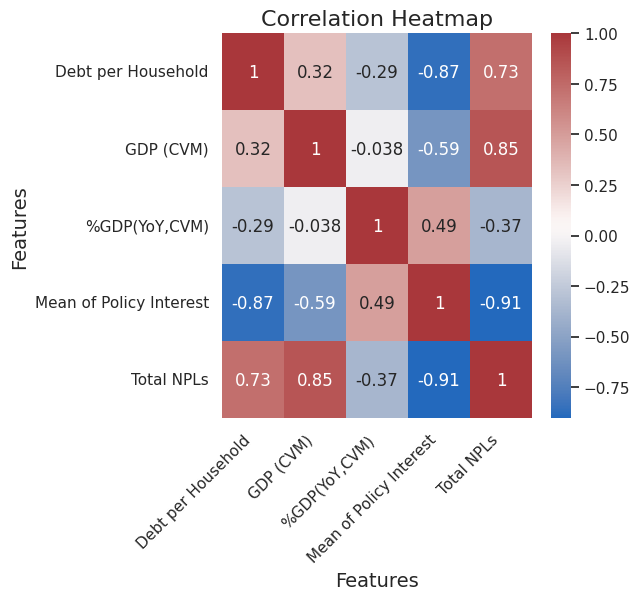

In [ ]:
df_merge = pd.concat([df_debt_test['Year'],df_debt_test['Debt'], df_GDP_filter['GDP'], df_GDP_filter['%GDP (YoY)(CVM)'], df_inter_filter['avg interest'], df_npl_filter['Total NPLs']], axis=1)
print(df_merge)
df_merge.columns = ['Year', 'Debt per Household', 'GDP (CVM)', '%GDP(YoY,CVM)', 'Mean of Policy Interest', 'Total NPLs']
df_corr = df_merge.drop(columns=['Year'])
print(df_corr.corr())

##Visualize
sb.set (rc = {'figure.figsize':(5, 5)})
dataplot = sb.heatmap(df_corr.corr(), cmap="vlag", annot=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# displaying heatmap
plt.show()



# Covariance

In [ ]:
covariance_matrix = df_corr.cov()

covariance_df = pd.DataFrame(covariance_matrix, columns=df_corr.columns, index=df_corr.columns)

print("Covariance matrix:")
print(covariance_df)


Covariance matrix:
                         Debt per Household     GDP (CVM)  %GDP(YoY,CVM)  \
Debt per Household             1.753144e+08  2.710535e+09  -12326.779861   
GDP (CVM)                      2.710535e+09  3.995007e+11  -75992.508333   
%GDP(YoY,CVM)                 -1.232678e+04 -7.599251e+04       9.976111   
Mean of Policy Interest       -7.158231e+03 -2.344510e+05       0.965806   
Total NPLs                     3.742082e+09  2.100192e+11 -453788.638889   

                         Mean of Policy Interest    Total NPLs  
Debt per Household                  -7158.231181  3.742082e+09  
GDP (CVM)                         -234450.954167  2.100192e+11  
%GDP(YoY,CVM)                           0.965806 -4.537886e+05  
Mean of Policy Interest                 0.389478 -2.197411e+05  
Total NPLs                        -219741.115694  1.513265e+11  


<Figure size 1000x800 with 0 Axes>

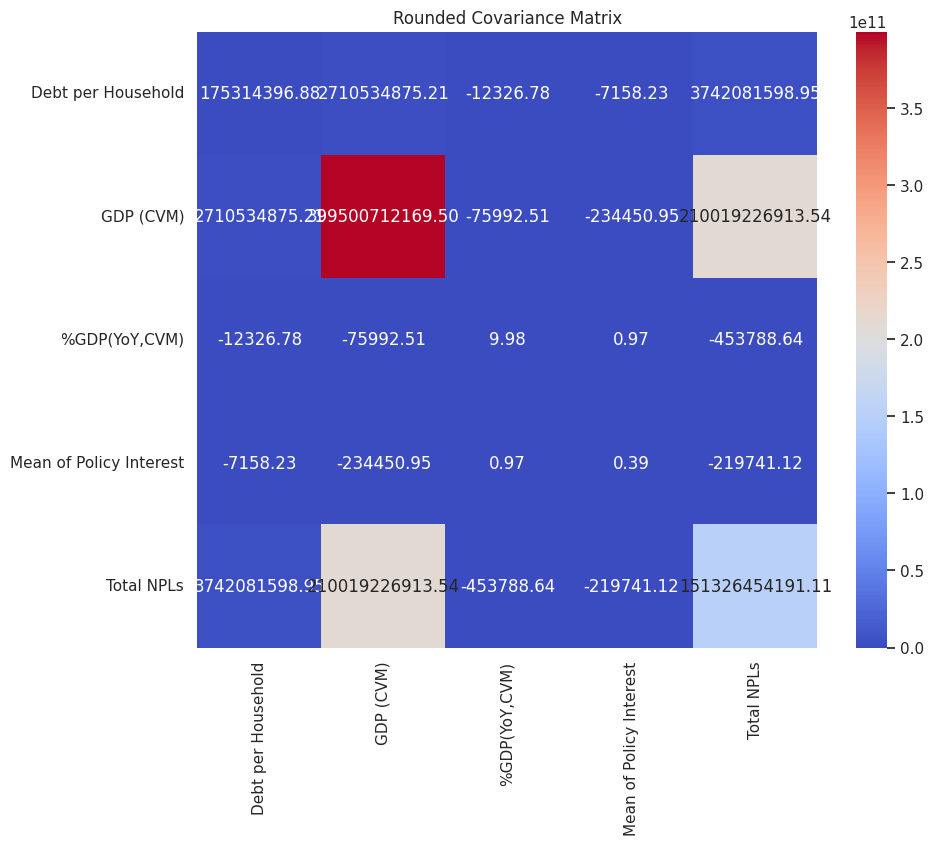

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a heatmap of the covariance matrix
plt.figure(figsize=(10, 8))
rounded_covariance_df = covariance_df.round(2)

# Plotting a heatmap of the rounded covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(rounded_covariance_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Rounded Covariance Matrix")
plt.show()

# Corr Map


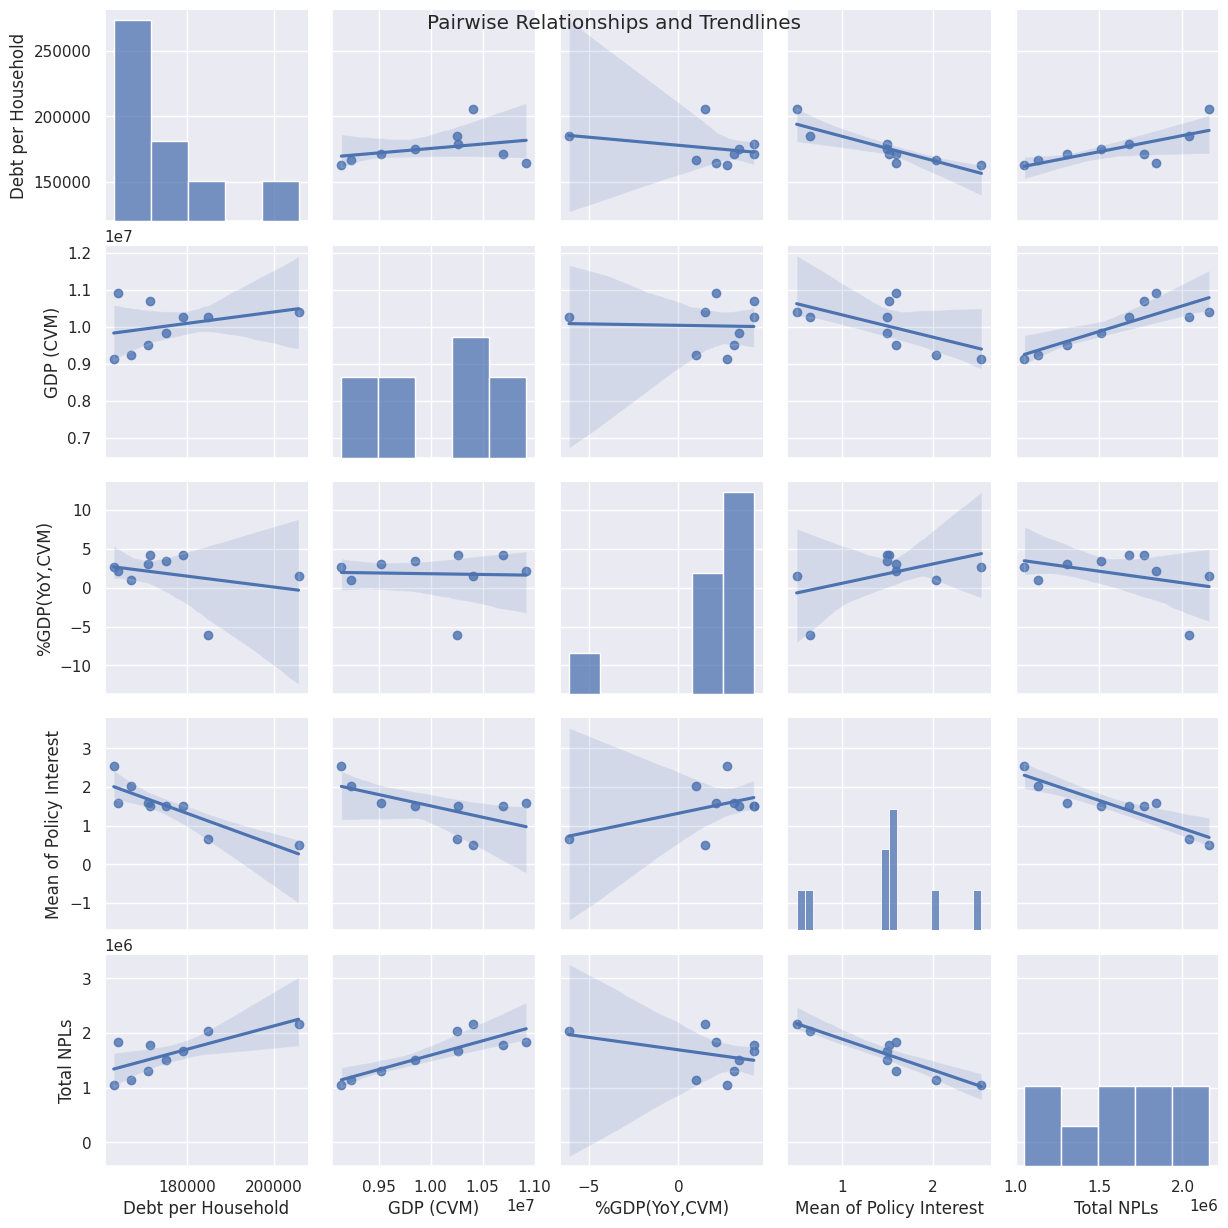

In [ ]:
sb.set (rc = {'figure.figsize':(3, 3)})
g = sb.pairplot(df_corr,  diag_kind="hist", kind='reg')
g.fig.suptitle('Pairwise Relationships and Trendlines')
plt.show()

#Interest

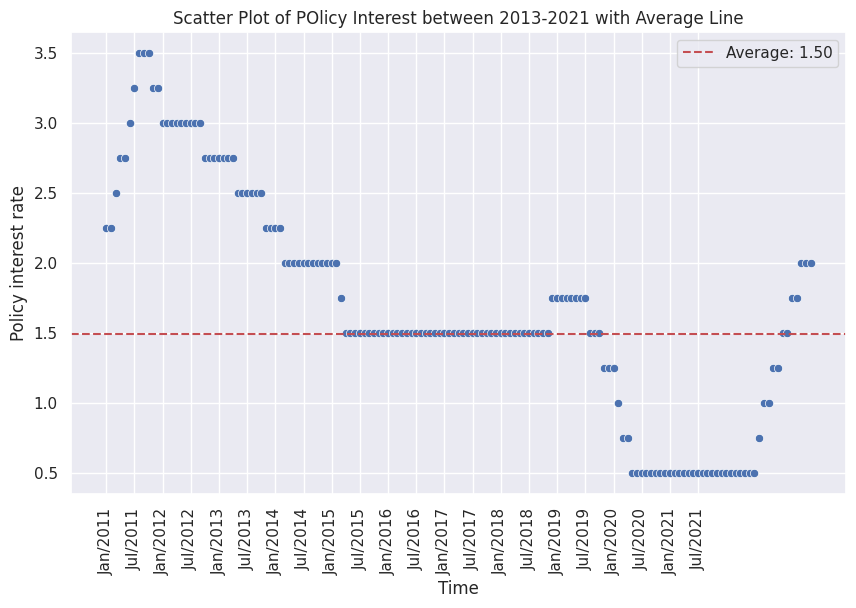

In [ ]:
#print(df_interest)
df_interest2013 = df_interest.loc[24:131]
#print(df_interest2013)

average_y = df_interest2013['Policy interest rate'].mean()
#print(average_y)
# Create a scatter plot using Seaborn

plt.figure(figsize=(10, 6))
sb.scatterplot(df_interest, x= 'Time', y='Policy interest rate')
plt.ylabel = 'Policy interest rate (%)'
# Add an average line
plt.axhline(y=average_y, color='r', linestyle='--', label=f'Average: {average_y:.2f}')  # Red dashed line for average

x_ticks_subset = range(0, 131, 6)
plt.xticks(ticks=x_ticks_subset, rotation=90)  # Show only the specified subset of x-axis labels

# Set plot labels and title

plt.title('Scatter Plot of POlicy Interest between 2013-2021 with Average Line')

# Show the plot
plt.legend()  # Show legend with the label 'Average'
plt.show()


       year  Interest
0   2013/Q1      2.75
1   2013/Q2      2.58
2   2013/Q3      2.50
3   2013/Q4      2.33
4   2014/Q1      2.17
5   2014/Q2      2.00
6   2014/Q3      2.00
7   2014/Q4      2.00
8   2015/Q1      1.92
9   2015/Q2      1.50
10  2015/Q3      1.50
11  2015/Q4      1.50
12  2016/Q1      1.50
13  2016/Q2      1.50
14  2016/Q3      1.50
15  2016/Q4      1.50
16  2017/Q1      1.50
17  2017/Q2      1.50
18  2017/Q3      1.50
19  2017/Q4      1.50
20  2018/Q1      1.50
21  2018/Q2      1.50
22  2018/Q3      1.50
23  2018/Q4      1.58
24  2019/Q1      1.75
25  2019/Q2      1.75
26  2019/Q3      1.58
27  2019/Q4      1.33
28  2020/Q1      1.00
29  2020/Q2      0.58
30  2020/Q3      0.50
31  2020/Q4      0.50
32  2021/Q1      0.50
33  2021/Q2      0.50
34  2021/Q3      0.50
35  2021/Q4      0.50
1.495


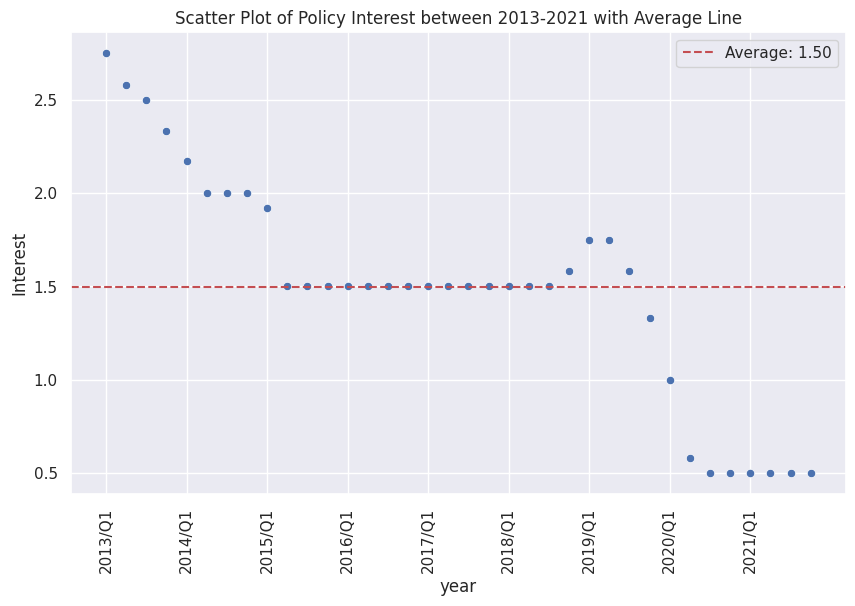

In [ ]:
#print(df_interest)
df_interest_Q = pd.read_csv('/content/Interest_Q.csv')
print(df_interest_Q)

average_y = df_interest_Q['Interest'].mean()
print(average_y)
# Create a scatter plot using Seaborn

plt.figure(figsize=(10, 6))
sb.scatterplot(df_interest_Q, x= 'year', y='Interest')
plt.ylabel = 'Policy interest rate (%)'
# Add an average line
plt.axhline(y=average_y, color='r', linestyle='--', label=f'Average: {average_y:.2f}')  # Red dashed line for average

x_ticks_subset = range(0, 36, 4)
plt.xticks(ticks=x_ticks_subset, rotation=90)  # Show only the specified subset of x-axis labels

# Set plot labels and title

plt.title('Scatter Plot of Policy Interest between 2013-2021 with Average Line')

# Show the plot
plt.legend()  # Show legend with the label 'Average'
plt.show()


In [ ]:
print(average_y)

1.495


In [ ]:
#print(df_interest2013)
df_interest_Q_stats = df_interest_Q.describe()
print(df_interest_Q_stats)
print('Variance :', round(df_interest_Q['Interest'].var(),4))
print('Mode :', df_interest_Q['Interest'].mode())
print('Median :', df_interest_Q['Interest'].median())

        Interest
count  36.000000
mean    1.495000
std     0.610744
min     0.500000
25%     1.457500
50%     1.500000
75%     1.792500
max     2.750000
Variance : 0.373
Mode : 0    1.5
Name: Interest, dtype: float64
Median : 1.5


# GDP

In [ ]:
## GDP per Quarter
df_GDP_Q = pd.read_csv('/content/GDP_Q.csv')
#print(df_GDP_Q)
GDP_stat = df_GDP_Q.describe()
print(GDP_stat)
print('Variance :', round(df_GDP_Q.var(),4))
#print('Mode :', df_GDP_Q.mode())
print('Median :', df_GDP_Q.median())

                GDP  %GDP(YoY,CVM)
count  3.600000e+01      36.000000
mean   2.507870e+06       1.808333
std    1.864905e+05       3.625101
min    2.185277e+06     -12.200000
25%    2.379326e+06       1.025000
50%    2.484194e+06       2.800000
75%    2.664162e+06       3.800000
max    2.845657e+06       7.700000
Variance : GDP              3.477869e+10
%GDP(YoY,CVM)    1.314140e+01
dtype: float64
Median : GDP              2484194.5
%GDP(YoY,CVM)          2.8
dtype: float64


<ipython-input-18-5c4f9de3be54>:6: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Variance :', round(df_GDP_Q.var(),4))
<ipython-input-18-5c4f9de3be54>:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Median :', df_GDP_Q.median())


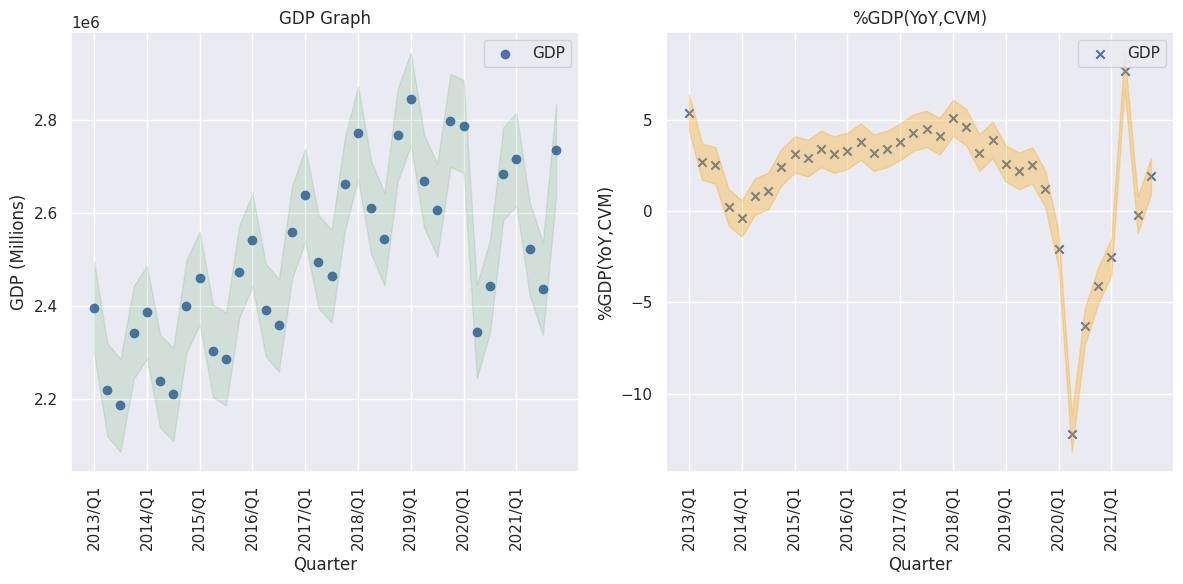

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot left graph on the first subplot (axes[0])
axes[0].scatter(df_GDP_Q['Year'], df_GDP_Q['GDP'], label='GDP', marker='o')
axes[0].set_xlabel('Quarter')
axes[0].set_ylabel('GDP (Millions)')
axes[0].set_title('GDP Graph')
axes[0].legend()
axes[0].fill_between(df_GDP_Q['Year'], df_GDP_Q['GDP'] - 100000, df_GDP_Q['GDP'] + 100000, color='green', alpha=0.1)
x_ticks_subset = range(0, 36, 4)
x_ticks_subset = df_GDP_Q['Year'][::4]  # Use every 5th data point as tick positions
axes[0].set_xticks(x_ticks_subset)
axes[0].set_xticklabels(x_ticks_subset, rotation=90)
axes[1].scatter(df_GDP_Q['Year'], df_GDP_Q['%GDP(YoY,CVM)'], label='GDP', marker='x')
axes[1].set_xlabel('Quarter')
axes[1].set_ylabel('%GDP(YoY,CVM)')
axes[1].set_title('%GDP(YoY,CVM)')
axes[1].legend()
axes[1].fill_between(df_GDP_Q['Year'], df_GDP_Q['%GDP(YoY,CVM)'] - 1, df_GDP_Q['%GDP(YoY,CVM)'] + 1, color='orange', alpha=0.3)
x_ticks_subset = range(0, 36, 4)
plt.xticks(ticks=x_ticks_subset, rotation=90)
# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

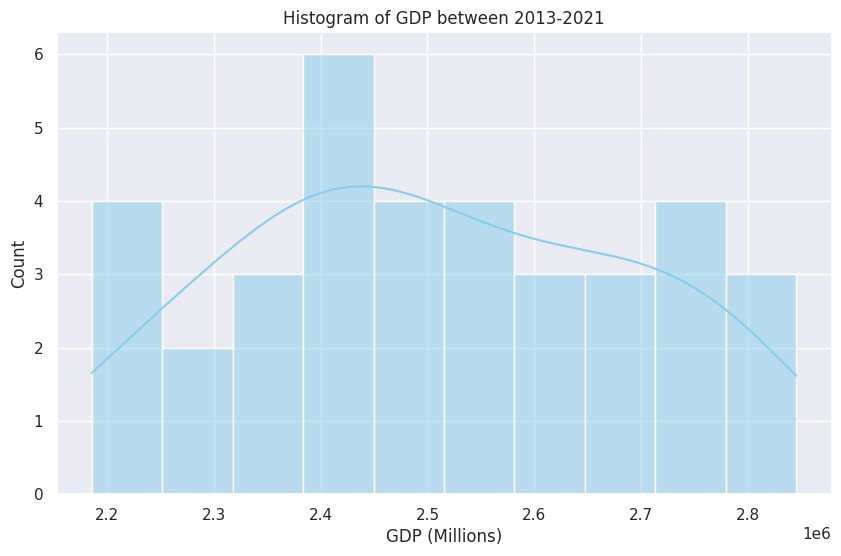

In [ ]:
## histogram
# Create a histogram using Seaborn
plt.figure(figsize=(10, 6))
sb.histplot(df_GDP_Q['GDP'], bins=10, kde=True, color='skyblue')
plt.xlabel('GDP (Millions)')
plt.title('Histogram of GDP between 2013-2021')
plt.show()

#NPLs

In [ ]:
## NPLs
df_NPL_Q = df_NPLs[:-6]
df_NPL_Q.columns = ['Year', 'Total NPLs', '%NPLs per loan']
#print(df_NPL_Q[:])

df_NPLs_stat = df_NPL_Q.describe()
print(df_NPLs_stat)
print('Variance of Total NPLs:', df_NPL_Q['Total NPLs'].var())
print('Variance of %NPLs per Loan:', df_NPL_Q['%NPLs per loan'].var())
print('Median of Total NPLs:', df_NPL_Q['Total NPLs'].median())
print('Median of %NPLs per Loan:', df_NPL_Q['%NPLs per loan'].median())
print('Mode of %NPLs per Loan:', df_NPL_Q['%NPLs per loan'].median())


          Total NPLs  %NPLs per loan
count      36.000000       36.000000
mean   402658.222222        2.746389
std     93674.790027        0.341661
min    256003.000000        2.150000
25%    308263.750000        2.370000
50%    422227.000000        2.925000
75%    466151.000000        2.972500
max    546299.000000        3.140000
Variance of Total NPLs: 8774966286.577778
Variance of %NPLs per Loan: 0.11673230158730158
Median of Total NPLs: 422227.0
Median of %NPLs per Loan: 2.925
Mode of %NPLs per Loan: 2.925


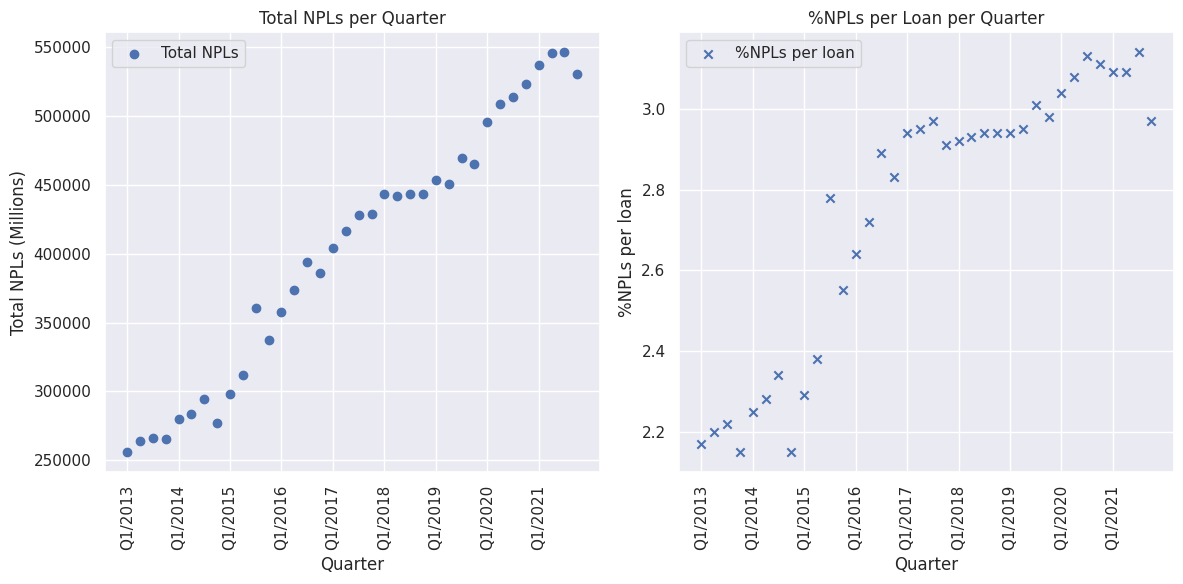

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot left graph on the first subplot (axes[0])
axes[0].scatter(df_NPL_Q['Year'], df_NPL_Q['Total NPLs'], label='Total NPLs', marker='o')
axes[0].set_xlabel('Quarter')
axes[0].set_ylabel('Total NPLs (Millions)')
axes[0].set_title('Total NPLs per Quarter')
axes[0].legend()
#axes[0].fill_between(df_NPL_Q['Year'], df_NPL_Q['Total NPL'] - 70000, df_NPL_Q['Total NPL'] + 70000, color='green', alpha=0.1)
x_ticks_subset = range(0, 36, 4)
x_ticks_subset = df_NPL_Q['Year'][::4]  # Use every 5th data point as tick positions
axes[0].set_xticks(x_ticks_subset)
axes[0].set_xticklabels(x_ticks_subset, rotation=90)
axes[1].scatter(df_NPL_Q['Year'], df_NPL_Q['%NPLs per loan'], label='%NPLs per loan', marker='x')
axes[1].set_xlabel('Quarter')
axes[1].set_ylabel('%NPLs per loan')
axes[1].set_title('%NPLs per Loan per Quarter')
axes[1].legend()
#axes[1].fill_between(df_NPL_Q['Year'], df_NPL_Q['% NPLs per loan'] - 0.1, df_NPL_Q['% NPLs per loan'] + 0.1, color='orange', alpha=0.3)
x_ticks_subset = range(0, 36, 4)
plt.xticks(ticks=x_ticks_subset, rotation=90)
# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

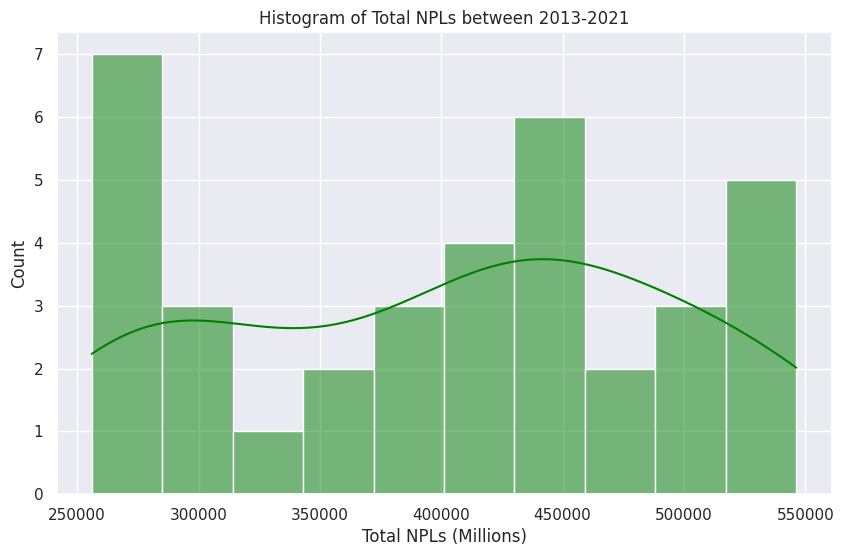

In [ ]:
## Histogram
# Create a histogram using Seaborn
plt.figure(figsize=(10, 6))
sb.histplot(df_NPL_Q['Total NPLs'], bins=10, kde=True, color='green')
plt.xlabel('Total NPLs (Millions)')
plt.title('Histogram of Total NPLs between 2013-2021')
plt.show()

# Debt

In [ ]:
##debt
df_debt_2 = pd.read_csv('/content/Debt.csv')
df_debt_y = df_debt_2[(df_debt_2['REGION'] == 'All Region') & (df_debt_2['SOC_ECO_CLASS'] == 'Total') & (df_debt_2['SOURCE_LOAN'] == 'Total') & (df_debt_2['PURPOSE_BORROW'] == 'Total')]


print(df_debt_y)

print(df_reindexed)

     YEAR      REGION SOC_ECO_CLASS SOURCE_LOAN PURPOSE_BORROW  VALUE [Baht]
0    2011  All Region         Total       Total          Total        134900
42   2013  All Region         Total       Total          Total        163087
119  2017  All Region         Total       Total          Total        178994
161  2019  All Region         Total       Total          Total        164055
203  2021  All Region         Total       Total          Total        205679
    YEAR      REGION SOC_ECO_CLASS SOURCE_LOAN PURPOSE_BORROW  VALUE [Baht]
0   2011  All Region         Total       Total          Total     134900.00
1   2012         NaN           NaN         NaN            NaN     148993.50
2   2013  All Region         Total       Total          Total     163087.00
3   2014         NaN           NaN         NaN            NaN     167063.75
4   2015         NaN           NaN         NaN            NaN     171040.50
5   2016         NaN           NaN         NaN            NaN     175017.25
6   20

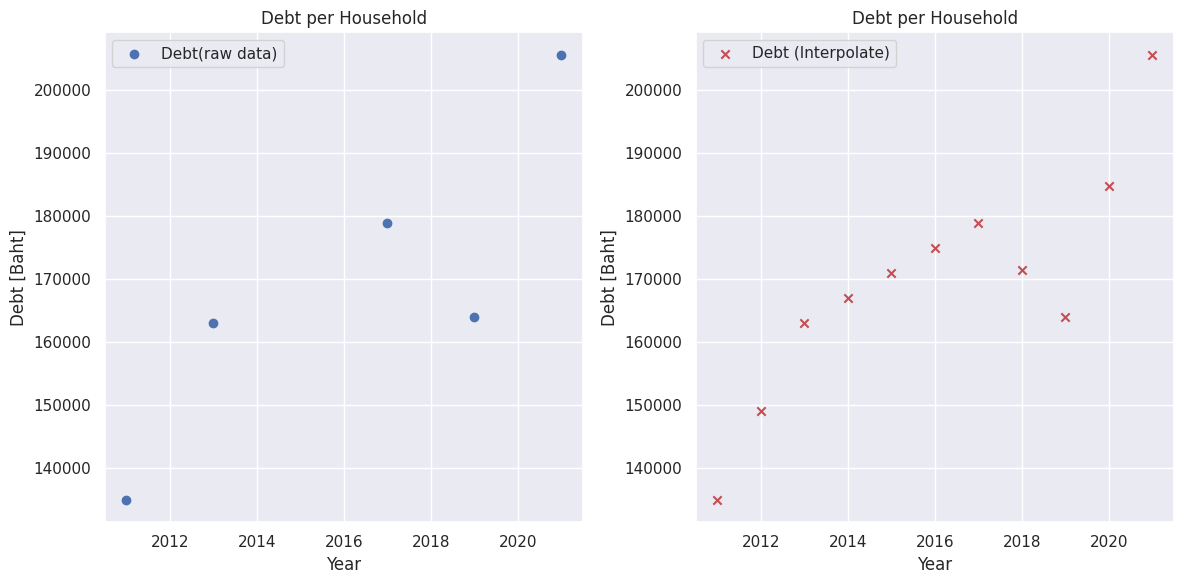

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot left graph on the first subplot (axes[0])
axes[0].scatter(df_debt_y['YEAR'], df_debt_y['VALUE [Baht]'], label='Debt(raw data)', marker='o')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Debt [Baht]')
axes[0].set_title('Debt per Household')
axes[0].legend()
#axes[0].fill_between(df_NPL_Q['Year'], df_NPL_Q['Total NPL'] - 70000, df_NPL_Q['Total NPL'] + 70000, color='green', alpha=0.1)
#x_ticks_subset = range(0, 36, 4)
#x_ticks_subset = df_NPL_Q['Year'][::4]  # Use every 5th data point as tick positions
#axes[0].set_xticks(x_ticks_subset)
#axes[0].set_xticklabels(x_ticks_subset, rotation=90)
axes[1].scatter(df_reindexed['YEAR'], df_reindexed['VALUE [Baht]'], label='Debt (Interpolate)', marker='x', color = 'r')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Debt [Baht]')
axes[1].set_title('Debt per Household')
axes[1].legend()
#axes[1].fill_between(df_NPL_Q['Year'], df_NPL_Q['% NPLs per loan'] - 0.1, df_NPL_Q['% NPLs per loan'] + 0.1, color='orange', alpha=0.3)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df_debt_y_stat = df_debt_y['VALUE [Baht]'].describe()
print(df_debt_y_stat)
print('Variance :', round(df_debt_y['VALUE [Baht]'].var(),4))
print('Median :', df_debt_y['VALUE [Baht]'].median())

count         5.000000
mean     169343.000000
std       25820.860878
min      134900.000000
25%      163087.000000
50%      164055.000000
75%      178994.000000
max      205679.000000
Name: VALUE [Baht], dtype: float64
Variance : 666716856.5
Median : 164055.0


# Hypothesis testing

In [ ]:
## Show usable data
df_corr

,Debt per Household,GDP (CVM),"%GDP(YoY,CVM)",Mean of Policy Interest,Total NPLs
0,163087.00,9142087.0,2.7,2.54,1051847.0
1,167063.75,9232088.0,1.0,2.04,1134767.0
2,171040.50,9521426.0,3.1,1.60,1307913.0
3,175017.25,9848502.0,3.4,1.50,1510397.0
4,178994.00,10259941.0,4.2,1.50,1677951.0
5,171524.50,10693205.0,4.2,1.52,1772241.0
6,164055.00,10919319.0,2.1,1.60,1838996.0
7,184867.00,10256852.0,-6.1,0.65,2041951.0
8,205679.00,10409894.0,1.5,0.50,2159633.0


In [ ]:
df_corr.corr()

,Debt per Household,GDP (CVM),"%GDP(YoY,CVM)",Mean of Policy Interest,Total NPLs
Debt per Household,1.000000,0.323882,-0.294754,-0.866275,0.726519
GDP (CVM),0.323882,1.000000,-0.038065,-0.594363,0.854167
"%GDP(YoY,CVM)",-0.294754,-0.038065,1.000000,0.489968,-0.369331
Mean of Policy Interest,-0.866275,-0.594363,0.489968,1.000000,-0.905133
Total NPLs,0.726519,0.854167,-0.369331,-0.905133,1.000000


In [ ]:
from scipy.stats import pearsonr
from scipy.stats import t

# Assuming 'data' is your DataFrame containing the mentioned columns

# Calculate correlation matrix
correlation_matrix = df_corr.corr()

# Sample size (assuming all columns have equal non-null lengths)
sample_size = len(df_corr.dropna())

# Set your significance level (alpha)
alpha = 0.05

# Calculate critical t-value for two-tailed test
critical_t = t.ppf(1 - alpha / 2, sample_size - 2)  # Degrees of freedom = sample_size - 2
check_round = 0
# Perform hypothesis testing for each pair of variables
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            r, p_value = pearsonr(df_corr[col1].dropna(), df_corr[col2].dropna())

            # Calculate t-score using the alternative formula
            t_score = r * ((sample_size - 2) / (1 - r**2))**0.5
            check_round +=1
            print(f"Correlation between '{col1}' and '{col2}':")
            print(f"Correlation coefficient (r): {r:.4f}, p-value: {p_value:.4f}, T-score: {t_score:.4f}")

            # Check if the absolute t-score exceeds the critical t-value
            if abs(t_score) > critical_t:
                print("Correlation is statistically significant.")
                # Perform further actions if correlation is significant
                # Add your actions here, for example:
                # Perform additional analysis, visualize the correlation, etc.
            else:
                print("Correlation is not statistically significant.\n")

print(check_round)

Correlation between 'Debt per Household' and 'GDP (CVM)':
Correlation coefficient (r): 0.3239, p-value: 0.3952, T-score: 0.9057
Correlation is not statistically significant.

Correlation between 'Debt per Household' and '%GDP(YoY,CVM)':
Correlation coefficient (r): -0.2948, p-value: 0.4413, T-score: -0.8161
Correlation is not statistically significant.

Correlation between 'Debt per Household' and 'Mean of Policy Interest':
Correlation coefficient (r): -0.8663, p-value: 0.0025, T-score: -4.5879
Correlation is statistically significant.
Correlation between 'Debt per Household' and 'Total NPLs':
Correlation coefficient (r): 0.7265, p-value: 0.0266, T-score: 2.7974
Correlation is statistically significant.
Correlation between 'GDP (CVM)' and 'Debt per Household':
Correlation coefficient (r): 0.3239, p-value: 0.3952, T-score: 0.9057
Correlation is not statistically significant.

Correlation between 'GDP (CVM)' and '%GDP(YoY,CVM)':
Correlation coefficient (r): -0.0381, p-value: 0.9225, T-sc

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import t

# ... (existing code)

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            r, p_value = pearsonr(df_corr[col1].dropna(), df_corr[col2].dropna())

            # Calculate t-score using the alternative formula
            t_score = r * ((sample_size - 2) / (1 - r**2))**0.5

            # Calculate degrees of freedom
            degrees_freedom = sample_size - 2

            # Calculate p-value from 't' value
            p_val_from_t = t.sf(abs(t_score), degrees_freedom) * 2  # Multiply by 2 for two-tailed test

            print(f"Correlation between '{col1}' and '{col2}':")
            print(f"Correlation coefficient (r): {r:.4f}, p-value (from 't'): {p_val_from_t:.4f}, T-score: {t_score:.4f}")

            # Check if the p-value from 't' is less than the alpha level
            if p_val_from_t < alpha:
                print("Correlation is statistically significant.")
                # Perform further actions if correlation is significant
                # Add your actions here, for example:
                # Perform additional analysis, visualize the correlation, etc.
            else:
                print("Correlation is not statistically significant.\n")

# ... (rest of your code)


Correlation between 'Debt per Household' and 'GDP (CVM)':
Correlation coefficient (r): 0.3239, p-value (from 't'): 0.3952, T-score: 0.9057
Correlation is not statistically significant.

Correlation between 'Debt per Household' and '%GDP(YoY,CVM)':
Correlation coefficient (r): -0.2948, p-value (from 't'): 0.4413, T-score: -0.8161
Correlation is not statistically significant.

Correlation between 'Debt per Household' and 'Mean of Policy Interest':
Correlation coefficient (r): -0.8663, p-value (from 't'): 0.0025, T-score: -4.5879
Correlation is statistically significant.
Correlation between 'Debt per Household' and 'Total NPLs':
Correlation coefficient (r): 0.7265, p-value (from 't'): 0.0266, T-score: 2.7974
Correlation is statistically significant.
Correlation between 'GDP (CVM)' and 'Debt per Household':
Correlation coefficient (r): 0.3239, p-value (from 't'): 0.3952, T-score: 0.9057
Correlation is not statistically significant.

Correlation between 'GDP (CVM)' and '%GDP(YoY,CVM)':
Corr

In [ ]:
print(degrees_freedom)

7


In [ ]:
print(critical_t)

2.3646242510102993


# Forecasting

## Linear Regression

In [ ]:
pip install pandas scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
# Load the dataset
dataset = df_corr
print(dataset)

   Debt per Household   GDP (CVM)  %GDP(YoY,CVM)  Mean of Policy Interest  \
0           163087.00   9142087.0            2.7                     2.54   
1           167063.75   9232088.0            1.0                     2.04   
2           171040.50   9521426.0            3.1                     1.60   
3           175017.25   9848502.0            3.4                     1.50   
4           178994.00  10259941.0            4.2                     1.50   
5           171524.50  10693205.0            4.2                     1.52   
6           164055.00  10919319.0            2.1                     1.60   
7           184867.00  10256852.0           -6.1                     0.65   
8           205679.00  10409894.0            1.5                     0.50   

   Total NPLs  
0   1051847.0  
1   1134767.0  
2   1307913.0  
3   1510397.0  
4   1677951.0  
5   1772241.0  
6   1838996.0  
7   2041951.0  
8   2159633.0  


In [ ]:
# Define features (X) and target variable (y)

#X = dataset[['Mean of Policy Interest']]
X = dataset[['Total NPLs', 'Mean of Policy Interest']]

y = dataset['Debt per Household']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')
print(f'Root Mean Squared Error: {(mean_squared_error(y_test, y_pred))**0.5}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')


Mean Squared Error: 55502413.21354009
R-squared: 0.29955622992196373
Root Mean Squared Error: 7449.994175403099
Mean Absolute Error: 5569.557228167367


In [ ]:
print(df_NPLs)

       Year  Total NPL  % NPLs per loan
0   Q1/2013   256003.0             2.17
1   Q2/2013   263883.0             2.20
2   Q3/2013   266314.0             2.22
3   Q4/2013   265647.0             2.15
4   Q1/2014   279756.0             2.25
5   Q2/2014   283741.0             2.28
6   Q3/2014   294086.0             2.34
7   Q4/2014   277184.0             2.15
8   Q1/2015   298321.0             2.29
9   Q2/2015   311578.0             2.38
10  Q3/2015   360484.0             2.78
11  Q4/2015   337530.0             2.55
12  Q1/2016   357413.0             2.64
13  Q2/2016   373695.0             2.72
14  Q3/2016   393620.0             2.89
15  Q4/2016   385669.0             2.83
16  Q1/2017   404466.0             2.94
17  Q2/2017   416346.0             2.95
18  Q3/2017   428108.0             2.97
19  Q4/2017   429031.0             2.91
20  Q1/2018   443492.0             2.92
21  Q2/2018   442002.0             2.93
22  Q3/2018   443094.0             2.94
23  Q4/2018   443653.0             2.94


In [ ]:
"""
future_data = { 'Total NPLs': [2061727], 'Mean of Policy Interest': []}

future_df = pd.DataFrame(future_data)
future_predictions = model.predict(future_df)
print("Future Debt per Household predictions:", future_predictions)
"""

'\nfuture_data = { \'Total NPLs\': [2061727], \'Mean of Policy Interest\': []}\n\nfuture_df = pd.DataFrame(future_data)\nfuture_predictions = model.predict(future_df)\nprint("Future Debt per Household predictions:", future_predictions)\n'

In [ ]:
df_corr.to_excel('data_excel.xlsx')

In [ ]:
print(X_train)
print(X_test)

   Total NPLs  Mean of Policy Interest
5   1772241.0                     1.52
0   1051847.0                     2.54
8   2159633.0                     0.50
2   1307913.0                     1.60
4   1677951.0                     1.50
3   1510397.0                     1.50
6   1838996.0                     1.60
   Total NPLs  Mean of Policy Interest
7   2041951.0                     0.65
1   1134767.0                     2.04


## ARIMA


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = {
    'Debt per Household': [163087.00, 167063.75, 171040.50, 175017.25, 178994.00, 171524.50, 164055.00, 184867.00, 205679.00]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Create a date range for the entire period (2013 to 2026)
date_range = pd.date_range(start='2013-01-01', end='2026-01-01', freq='YS')


# Fit an ARIMA model
model = ARIMA(df['Debt per Household'], order=(1, 1, 1))  # Example order (p, d, q)
arima_model = model.fit()

# Predict values for the entire time range
predictions = arima_model.predict(start=1, end=len(date_range) - 1, typ='levels')


# Forecast future values (assuming next 5 time points)
forecast = arima_model.forecast(steps=7)  # Forecast 5 future values
forecast_years = pd.date_range(start='2021-01-01', periods=7, freq='YS')[1:]  # Create date range for forecast years
print(list(forecast))


[210749.00396400836, 215818.5420743286, 220887.61437376542, 225956.22090511947, 231024.36171118752, 236092.03683476243, 241159.2463186331]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(df['Debt per Household'], predictions[:9])
mae = mean_absolute_error(df['Debt per Household'], predictions[:9])
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", round(mse, 2))
print("Mean Absolute Error (MAE):", round(mae,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))

Mean Squared Error (MSE): 23215602.97
Mean Absolute Error (MAE): 4811.64
Root Mean Squared Error (RMSE): 4818.26


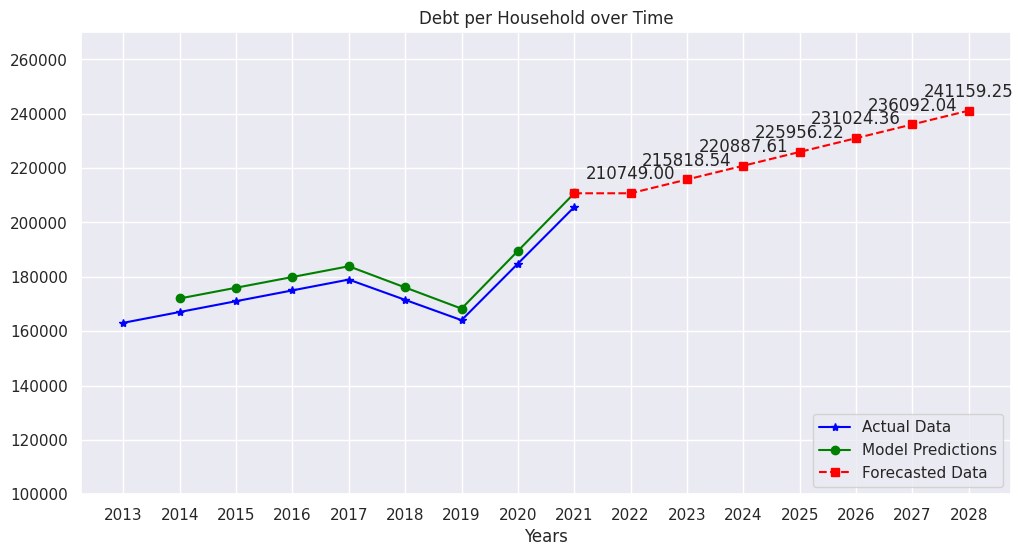

In [ ]:
x_values_1 = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
y_values_1 = [None] + list(predictions)[1:len(df)]
x_values_2 = [2022, 2023, 2024, 2025, 2026, 2027, 2028]
y_values_2 =  list(forecast)

# Visualize the 'Debt per Household' over time
plt.figure(figsize=(12, 6))
plt.plot(x_values_1, df['Debt per Household'], label='Actual Data', color='blue', marker='*')
plt.xlabel('Years')
#plt.ylabel('Debt / Household / Year [Baht]')
plt.title('Debt per Household over Time')


# Plotting the predicted values
plt.plot(x_values_1, y_values_1, label='Model Predictions', color='green', marker='o')

# Plotting the forecasted values and labeling forecast points
plt.plot([x_values_1[-1]] + x_values_2, [y_values_1[-1]] + y_values_2, marker='s', linestyle='--', color='red', label='Forecasted Data')
for i, txt in enumerate(y_values_2):
    plt.annotate(f'{txt:.2f}', (x_values_2[i], y_values_2[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Additional plot configurations
plt.xlabel('Years')
#plt.ylabel('Debt / Household / Year [Baht]')
plt.title('Debt per Household over Time')
plt.legend(loc='lower right')
plt.grid(True)
plt.ylim(100000, 270000)  # Set y-axis range
plt.xticks(x_values_1 + x_values_2)  # Show all years on x-axis
plt.show()